# __Laboratorio: Búsqueda no informada__

El siguiente taller de corresponde a la aplicación de algoritmos de búsqueda no informada en la solución de problemas en inteligencia artificial. Para el desarrollo del laboratorio tenga en cuenta lo siguiente:

* La actividad puede realizarse en grupos de máximo 3 personas
* El objetivo del taller es hacer énfasis en el proceso de modelamiento. Por esta razón se deben utilizar como base para la soluciones propuestas las clases y métodos disponibles. __Otras implementaciones no serán tenidas en cuenta__.
* Si se detecta cualquier tipo de fraude, la calificación de 0.0.
* El taller deberá ser sustentando por uno de los miembros del grupo

## __0. Recursos__

La clase abstracta `SearchProblem` servirá como una plantilla general para el proceso de formulación del problema como un problema de búsqueda. Cualquier implementación deberá heredar de esta clase

In [ ]:
class SearchProblem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial, goal=None, **kwds):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

    def actions(self, node):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, node, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def is_goal(self, node):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        return self.goal == node

    def action_cost(self, s, a, s1):
        """Return the cost of a solution path that arrives at state s1 from
        state s via action a. If the problem
        is such that the path doesn't matter, this function will only look at
        state s1.  If the path does matter, it will consider state s1
        and action a. The default method costs 1 for every step in the path."""
        return 1

    def h(self, node):
     raise NotImplementedError

    def g(self, node):
     return node.path_cost()

    def f(self, node):
     return self.g(node) + self.h(node)

También es posible implementar la clase abstracta `Node` para representar los posibles estados del problemas.

In [ ]:
class Node:
    """A node in a search problem"""
    def __init__(self, state='', parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action

    def states_path(self):
        """The requiered sequence of states to get this node"""
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]

    def actions_path(self):
        """The required sequence of actions to get this node"""
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]

    def path_cost(self):
        total_cost = 0
        if self.parent is None:
            return total_cost
        total_cost += self.cost + self.parent.path_cost()
        return total_cost

    def __eq__(self, node):
        if node:
            return self.state == node.state
        return False

    def __repr__(self):
        return self.state

Una implementación de los algoritmos `BFS` y `DFS` tal como se vió en clase.

In [ ]:
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs

def BFS(problem, fringe = []):
    closed = []
    fringe.append(problem.initial)
    while True:
        if not fringe:
            return 'FAILURE'
        node = fringe.pop(0)
        if problem.is_goal(node):
            return node
        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.append(child)

def DFS(problem, fringe = []):
    closed = []
    fringe.append(problem.initial)
    while True:
        if not fringe:
            return 'FAILURE'
        node = fringe.pop()
        if problem.is_goal(node):
            return node
        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.append(child)



In [ ]:
import heapq
class PriorityQueue:
    """
      Implements a priority queue data structure. Each inserted item
      has a priority associated with it and the client is usually interested
      in quick retrieval of the lowest-priority item in the queue. This
      data structure allows O(1) access to the lowest-priority item.
    """
    def  __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        # If item already in priority queue with higher priority, update its priority and rebuild the heap.
        # If item already in priority queue with equal or lower priority, do nothing.
        # If item not in priority queue, do the same thing as self.push.
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    break
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                break
        else:
            self.push(item, priority)

In [ ]:
def UCS(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            return node
        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.g(child))


## __1. (2.0 puntos) Ranas Saltarinas__

En este juego el estado inicial se define como una secuencia de cuadrados con `N` ranas azules a la izquierda, luego un cuadrado vacío y luego `N` ranas de color rojo a la derecha. La figura presenta un ejemplo para `N=2`. Representaremos el estado del juego como la cadena `'AA.RR'`. El objetivo es intercambiar las piezas, llegando al estado `'RR.AA'`. Una pieza `'A'` se mueve de izquierda a derecha, ya sea deslizándose un espacio hacia adelante cuando el siguiente espacio está vacío, o se mueve dos espacios hacia adelante si el segundo espacio está vacío y hay una `'R'` en el medio para saltar. Las piezas `'R'` se mueven de derecha a izquierda de la misma forma. En este caso, definiremos una acción como una pareja `(i, j)` que representa intercambiar las piezas en esas posiciones. Por ejemplo, Las acciones disponibles para el estado presentado en la figura serán: `{(1, 2), (3, 2)}`. La rana azul en la posición `1` o la rana roja en la posición `3` pueden intercambiar lugares con el espacio en blanco en la posición `2`.


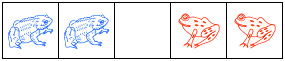



In [1]:
# Solución propuesta

class Tablero:
    def __init__(self, estado, padre=None, accion=None, costo=1):
        self.estado = estado
        self.padre = padre
        self.accion = accion
        self.costo = costo # Add this line to define the 'costo' attribute

    def __repr__(self):
        return ' '.join(self.estado) + '\n'

    def __lt__(self, other):
        return self.costo < other.costo # Now you can access self.costo here

In [2]:
from collections import deque

class Problema:
    def __init__(self, estado_inicial, estado_objetivo):
        self.estado_inicial = Tablero(estado_inicial)
        self.estado_objetivo = estado_objetivo

    def acciones(self, nodo):
        index = nodo.estado.index('_')
        movimientos = []

        if index > 0 and nodo.estado[index - 1] == 'A':
            movimientos.append(f"{index - 1} -> {index}")  # Movimiento normal

        if index > 1 and nodo.estado[index - 2] == 'A' and nodo.estado[index - 1] == 'R':
            movimientos.append(f"{index - 2} -> {index}")  # Salto sobre 'R'

        if index < 4 and nodo.estado[index + 1] == 'R':
            movimientos.append(f"{index + 1} -> {index}")  # Movimiento normal

        if index < 3 and nodo.estado[index + 2] == 'R' and nodo.estado[index + 1] == 'A':
            movimientos.append(f"{index + 2} -> {index}")  # Salto sobre 'A'

        return movimientos

    #The methods "resultado" and "es_objetivo" are now correctly indented within the "Problema" class

    def resultado(self, nodo, accion):
        estado = list(nodo.estado)
        index1, index2 = map(int, accion.split(" -> "))
        estado[index1], estado[index2] = estado[index2], estado[index1]
        return Tablero("".join(estado), padre=nodo, accion=accion, costo=nodo.costo + 1)#Se agrega el retorno del costo
    def es_objetivo(self, nodo):
        return nodo.estado == self.estado_objetivo

In [3]:
def heuristica(nodo, problema):
    return sum(1 for i in range(len(nodo.estado)) if nodo.estado[i] != problema.estado_objetivo[i])#cuántas posiciones difieren entre el estado actual y el objetivo.

In [4]:
def heuristica(nodo, problema):#esta heuristica me la dio como opción con Chat GPT
    distancia = 0
    for i, letra in enumerate(nodo.estado):
        pos_correcta = problema.estado_objetivo.index(letra)  # Encuentra la posición correcta de la letra
        distancia += abs(i - pos_correcta)  # Calcula la distancia entre su posición actual y la correcta
    return distancia

In [5]:
def expandir(nodo, problema):
    """Expande un nodo dado para expandir todos sus hijos (ramas)"""
    hijos = []

    #bucle sobre cada accion posible que se pueda hacer en este nodo
    for accion in problema.acciones(nodo):

        hijo = problema.resultado(nodo, accion)
        hijos.append(hijo)

    return hijos

def UCS(problema):
    frontera = []
    heapq.heappush(frontera, (0, problema.estado_inicial))
    cerrados = set()
    while frontera:
        _, nodo = heapq.heappop(frontera)
        if problema.es_objetivo(nodo):
            return nodo
        if nodo.estado not in cerrados:
            cerrados.add(nodo.estado)
            for hijo in expandir(nodo, problema):
                if hijo.estado not in cerrados:
                    heapq.heappush(frontera, (hijo.costo, hijo))
    return "FAILURE"

def voraz(problema):
    frontera = []
    heapq.heappush(frontera, (heuristica(problema.estado_inicial, problema), problema.estado_inicial))
    cerrados = set()
    while frontera:
        _, nodo = heapq.heappop(frontera)
        if problema.es_objetivo(nodo):
            return nodo
        if nodo.estado not in cerrados:
            cerrados.add(nodo.estado)
            for hijo in expandir(nodo, problema):
                if hijo.estado not in cerrados:
                    heapq.heappush(frontera, (heuristica(hijo, problema), hijo))
    return "FAILURE"

def A_estrella(problema):
    frontera = []
    heapq.heappush(frontera, (0, problema.estado_inicial))
    cerrados = set()
    while frontera:
        _, nodo = heapq.heappop(frontera)
        if problema.es_objetivo(nodo):
            return nodo
        if nodo.estado not in cerrados:
            cerrados.add(nodo.estado)
            for hijo in expandir(nodo, problema):
                if hijo.estado not in cerrados:
                    f = hijo.costo + heuristica(hijo, problema)
                    heapq.heappush(frontera, (f, hijo))
    return "FAILURE"



In [6]:
def estados_camino(nodo):
    """Me devuelve el camino de estados desde el nodo inicial hasta el nodo objetivo."""
    camino = []

    while nodo:

        camino.append(nodo.estado)
        nodo = nodo.padre


    camino.reverse()
    return camino

def acciones_camino(nodo):
    """Me devuelve el camino de acciones desde el nodo inicial hasta el nodo objetivo."""
    camino = []
    while nodo and nodo.accion is not None:
        # Agrega la acción actual al camino
        camino.append(nodo.accion)
        nodo = nodo.padre
    # Invierte el camino para que empiece desde el estado inicial
    camino.reverse()
    return camino


In [22]:
def main():
    estado_inicial = "AA_RR"
    estado_objetivo = "RR_AA"
    problema = Problema(estado_inicial, estado_objetivo)

    print("\nResolviendo con UCS...")
    solucion = UCS(problema)
    if solucion != "FAILURE":
        print("Estados en el camino con UCS:")
        for estado in estados_camino(solucion):
            print(Tablero(estado))
    else:
        print("UCS: No se encontró solución.")

    print("\nResolviendo con Voraz...")
    solucion = voraz(problema)
    if solucion != "FAILURE":
        print("Estados en el camino con Voraz:")
        for estado in estados_camino(solucion):
            print(Tablero(estado))
    else:
        print("Voraz: No se encontró solución.")

    print("\nResolviendo con A*...")
    solucion = A_estrella(problema)
    if solucion != "FAILURE":
        print("Estados en el camino con A*:")
        for estado in estados_camino(solucion):
            print(Tablero(estado))
    else:
        print("A*: No se encontró solución.")

if __name__ == "__main__":
    main()



Resolviendo con UCS...
Estados en el camino con UCS:
A A _ R R

A A R _ R

A _ R A R

_ A R A R

R A _ A R

R A R A _

R A R _ A

R _ R A A

R R _ A A


Resolviendo con Voraz...
Estados en el camino con Voraz:
A A _ R R

A _ A R R

A R A _ R

A R A R _

A R _ R A

_ R A R A

R _ A R A

R R A _ A

R R _ A A


Resolviendo con A*...
Estados en el camino con A*:
A A _ R R

A _ A R R

A R A _ R

A R A R _

A R _ R A

_ R A R A

R _ A R A

R R A _ A

R R _ A A



## __2. (3.0 puntos) Problema de las Jarras de agua__

Usted tiene 2 jarras, una con capacidad de 3 litros y otra con capacidad de 5 litros. Además, cuenta con un grifo el cuál puede utilizar para llenar las jarras cuando lo requiera. Las jarras se pueden llenar totalmente o vaciar su contenido en el piso. También se puede vaciar el contenido de una jarra en la otra. Las jarras no tienen ninguna clase de marca. El objetivo es medir exactamente cuatro litros de agua. Considere el estado inicial como tener las dos jarras vacias.

* Construya una clase que herede de la clase `SearchProblem` para representar el problema
* Construya una clase que herede de la clase `Node` para representar las jarras
* Encuentre la solución al problema utilizando los algoritmos BFS y DFS
* Genere un gráfico de barras donde compare la cantidad de nodos expandidos por ambos algoritmos


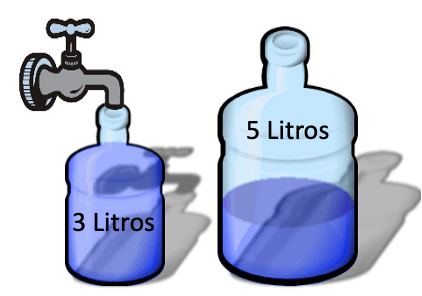





Resolviendo con algoritmo Voraz (Greedy)...
Nodos expandidos con Voraz: 12
Estados en el camino con Voraz:
Paso 0: Jarra de 3L: 0L, Jarra de 5L: 0L
Paso 1: Jarra de 3L: 3L, Jarra de 5L: 0L
Paso 2: Jarra de 3L: 0L, Jarra de 5L: 3L
Paso 3: Jarra de 3L: 3L, Jarra de 5L: 3L
Paso 4: Jarra de 3L: 1L, Jarra de 5L: 5L
Paso 5: Jarra de 3L: 1L, Jarra de 5L: 0L
Paso 6: Jarra de 3L: 0L, Jarra de 5L: 1L
Paso 7: Jarra de 3L: 3L, Jarra de 5L: 1L

Acciones en el camino con Voraz:
Acción 1: llenar_jarra_3
Acción 2: jarra_3_a_jarra_5
Acción 3: llenar_jarra_3
Acción 4: jarra_3_a_jarra_5
Acción 5: vaciar_jarra_5
Acción 6: jarra_3_a_jarra_5
Acción 7: llenar_jarra_3


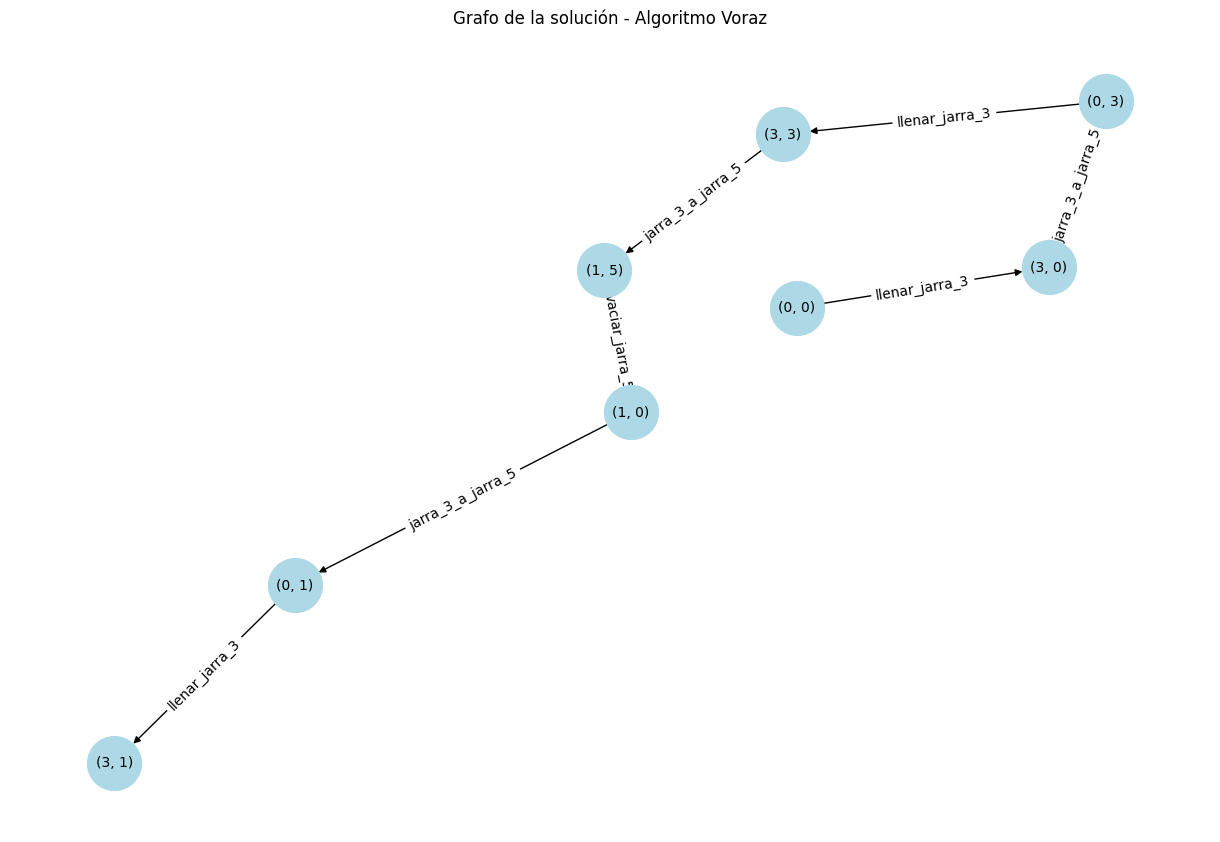

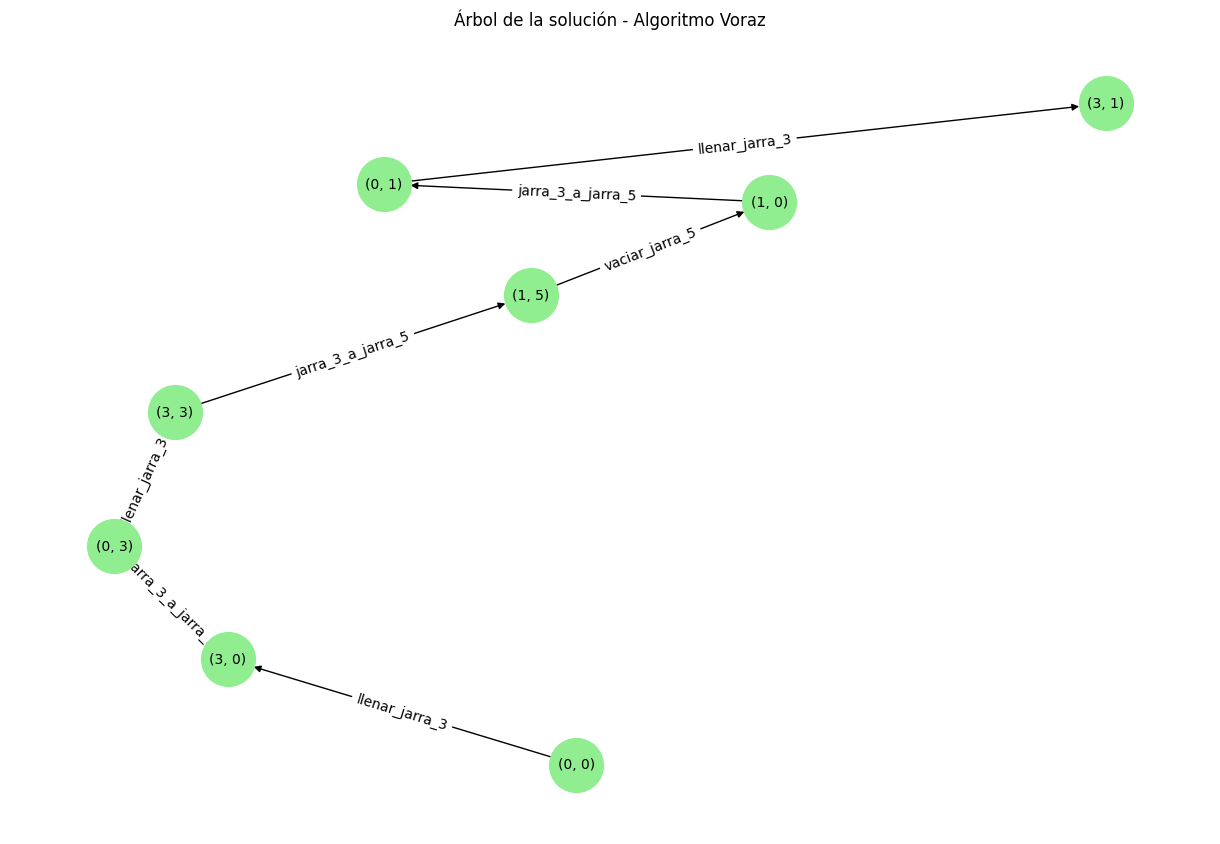


Resolviendo con algoritmo A*...
Nodos expandidos con A*: 13
Estados en el camino con A*:
Paso 0: Jarra de 3L: 0L, Jarra de 5L: 0L
Paso 1: Jarra de 3L: 3L, Jarra de 5L: 0L
Paso 2: Jarra de 3L: 0L, Jarra de 5L: 3L
Paso 3: Jarra de 3L: 3L, Jarra de 5L: 3L
Paso 4: Jarra de 3L: 1L, Jarra de 5L: 5L
Paso 5: Jarra de 3L: 1L, Jarra de 5L: 0L
Paso 6: Jarra de 3L: 0L, Jarra de 5L: 1L
Paso 7: Jarra de 3L: 3L, Jarra de 5L: 1L

Acciones en el camino con A*:
Acción 1: llenar_jarra_3
Acción 2: jarra_3_a_jarra_5
Acción 3: llenar_jarra_3
Acción 4: jarra_3_a_jarra_5
Acción 5: vaciar_jarra_5
Acción 6: jarra_3_a_jarra_5
Acción 7: llenar_jarra_3


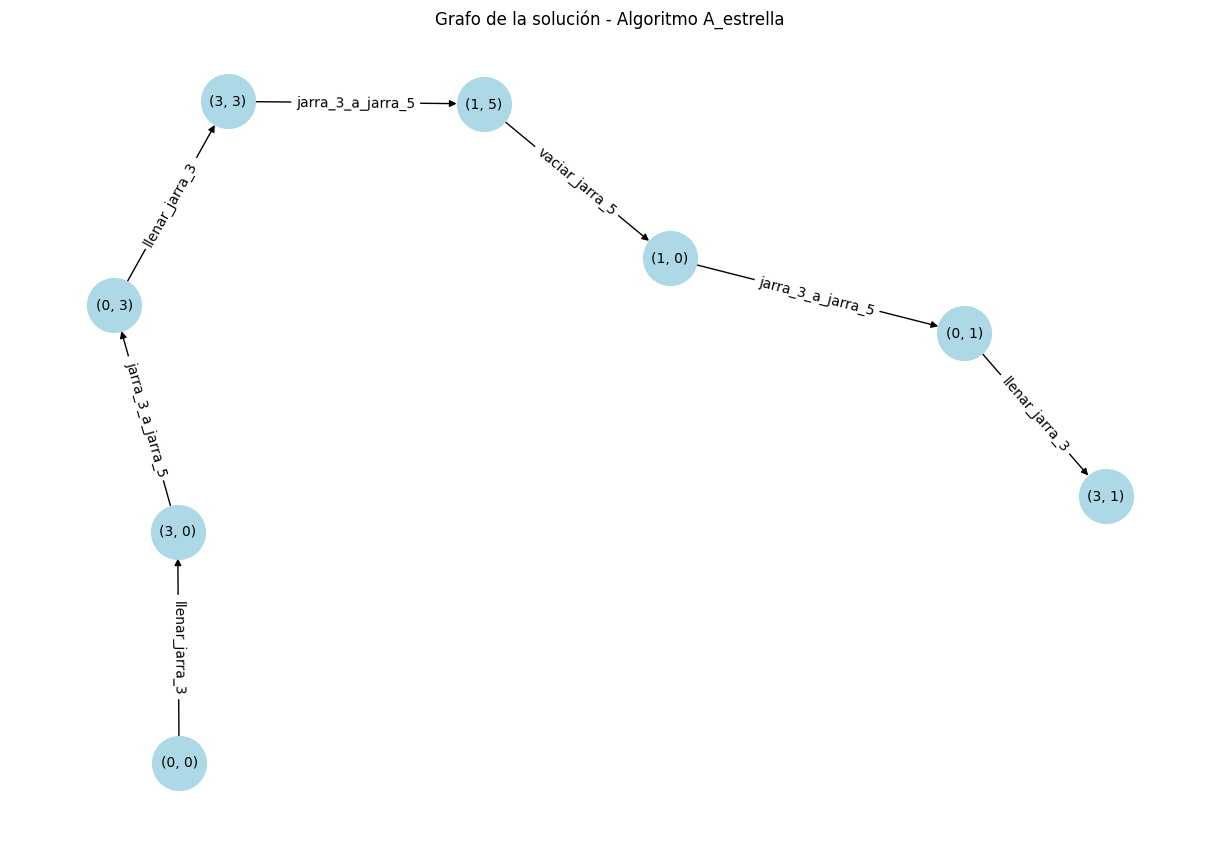

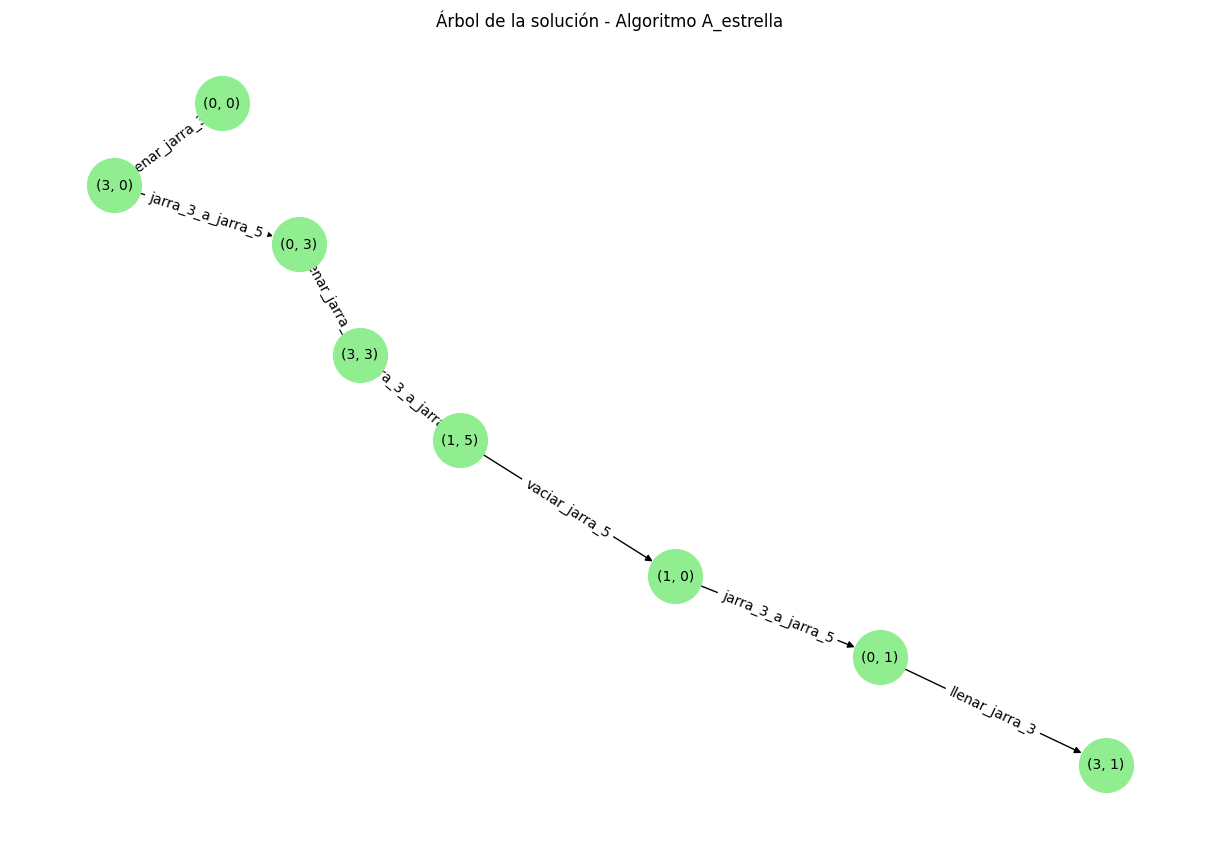

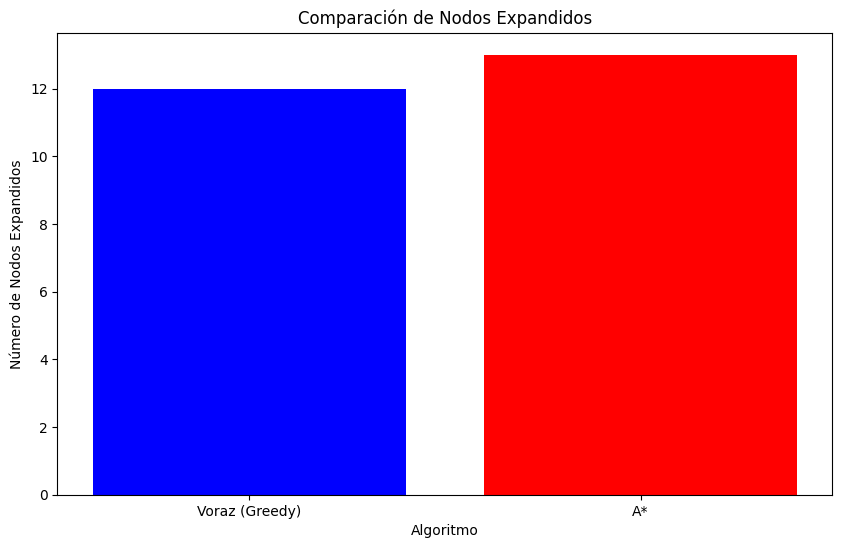

In [8]:
# Solución propuesta
# Problema de las Jarras de Agua
# 
# Tenemos 2 jarras: una con capacidad de 3 litros y otra con capacidad de 5 litros.
# Podemos: llenarlas completamente, vaciarlas o verter agua de una jarra a otra.
# El objetivo es medir exactamente 4 litros en total.
# Estado inicial: ambas jarras vacías.

import heapq
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Clase para representar el estado de las jarras (similar al tablero en el problema de las ranas)
class Jarras:
    def __init__(self, estado, padre=None, accion=None, costo=1):
        # estado es una tupla (jarra_3, jarra_5) que indica los litros en cada jarra
        self.estado = estado
        self.padre = padre    # Nodo padre en el árbol de búsqueda
        self.accion = accion  # Acción que llevó a este estado
        self.costo = costo    # Costo acumulado para llegar a este nodo

    def __repr__(self):
        return f"Jarra de 3L: {self.estado[0]}L, Jarra de 5L: {self.estado[1]}L"

    def __lt__(self, other):
        # Para usar en la cola de prioridad (comparar nodos)
        return self.costo < other.costo

# Clase para representar el problema de búsqueda
class Problema:
    def __init__(self, estado_inicial, estado_objetivo=None):
        self.estado_inicial = Jarras(estado_inicial)
        self.estado_objetivo = estado_objetivo  # No lo usamos directamente

    def acciones(self, nodo):
        # Devuelve las acciones posibles en un estado
        jarra_3, jarra_5 = nodo.estado
        acciones_posibles = []
        
        # 1. Llenar la jarra de 3 litros
        if jarra_3 < 3:
            acciones_posibles.append("llenar_jarra_3")
        
        # 2. Llenar la jarra de 5 litros
        if jarra_5 < 5:
            acciones_posibles.append("llenar_jarra_5")
        
        # 3. Vaciar la jarra de 3 litros
        if jarra_3 > 0:
            acciones_posibles.append("vaciar_jarra_3")
        
        # 4. Vaciar la jarra de 5 litros
        if jarra_5 > 0:
            acciones_posibles.append("vaciar_jarra_5")
        
        # 5. Verter agua de la jarra de 3 litros a la de 5 litros
        if jarra_3 > 0 and jarra_5 < 5:
            acciones_posibles.append("jarra_3_a_jarra_5")
        
        # 6. Verter agua de la jarra de 5 litros a la de 3 litros
        if jarra_5 > 0 and jarra_3 < 3:
            acciones_posibles.append("jarra_5_a_jarra_3")
        
        return acciones_posibles

    def resultado(self, nodo, accion):
        # Devuelve el estado resultante de aplicar una acción
        jarra_3, jarra_5 = nodo.estado
        
        if accion == "llenar_jarra_3":
            nuevo_estado = (3, jarra_5)
        elif accion == "llenar_jarra_5":
            nuevo_estado = (jarra_3, 5)
        elif accion == "vaciar_jarra_3":
            nuevo_estado = (0, jarra_5)
        elif accion == "vaciar_jarra_5":
            nuevo_estado = (jarra_3, 0)
        elif accion == "jarra_3_a_jarra_5":
            # Calcular cuánta agua se puede verter
            cantidad_vertida = min(jarra_3, 5 - jarra_5)
            nuevo_estado = (jarra_3 - cantidad_vertida, jarra_5 + cantidad_vertida)
        elif accion == "jarra_5_a_jarra_3":
            # Calcular cuánta agua se puede verter
            cantidad_vertida = min(jarra_5, 3 - jarra_3)
            nuevo_estado = (jarra_3 + cantidad_vertida, jarra_5 - cantidad_vertida)
        
        return Jarras(nuevo_estado, padre=nodo, accion=accion, costo=nodo.costo + 1)

    def es_objetivo(self, nodo):
        # El objetivo es tener exactamente 4 litros de agua en total
        return sum(nodo.estado) == 4

# Función heurística para estimar la distancia al objetivo
def heuristica(nodo, problema):
    # Qué tan lejos estamos de tener 4 litros en total
    # Por ejemplo, si tenemos 2 litros en total, estamos a 2 de distancia del objetivo
    return abs(4 - sum(nodo.estado))

# Función para expandir un nodo y obtener sus hijos
def expandir(nodo, problema):
    """Expande un nodo para generar todos sus hijos posibles"""
    hijos = []
    for accion in problema.acciones(nodo):
        hijo = problema.resultado(nodo, accion)
        hijos.append(hijo)
    return hijos

# Algoritmo de búsqueda Voraz (Greedy)
def voraz(problema):
    """
    Algoritmo de búsqueda voraz: elige siempre el nodo que parece estar
    más cerca de la meta según la función heurística.
    """
    # Inicializar frontera con el nodo inicial (usamos una cola de prioridad)
    frontera = []
    heapq.heappush(frontera, (heuristica(problema.estado_inicial, problema), problema.estado_inicial))
    
    # Conjunto de estados visitados
    cerrados = set()
    
    # Contador de nodos expandidos
    nodos_expandidos = 0
    
    while frontera:
        # Extraer el nodo con menor valor heurístico
        _, nodo = heapq.heappop(frontera)
        
        # Verificar si es el objetivo
        if problema.es_objetivo(nodo):
            return nodo, nodos_expandidos
        
        # Procesar nodo si no ha sido visitado
        if nodo.estado not in cerrados:
            cerrados.add(nodo.estado)
            nodos_expandidos += 1
            
            # Expandir nodo y agregar hijos a la frontera
            for hijo in expandir(nodo, problema):
                if hijo.estado not in cerrados:
                    # Solo usamos el valor heurístico como prioridad
                    heapq.heappush(frontera, (heuristica(hijo, problema), hijo))
    
    return "FAILURE", nodos_expandidos

# Algoritmo de búsqueda A*
def A_estrella(problema):
    """
    Algoritmo A*: combina el costo acumulado g(n) y la estimación
    heurística h(n) para elegir el nodo más prometedor.
    """
    # Inicializar frontera con el nodo inicial
    frontera = []
    heapq.heappush(frontera, (heuristica(problema.estado_inicial, problema), problema.estado_inicial))
    
    # Conjunto de estados visitados
    cerrados = set()
    
    # Contador de nodos expandidos
    nodos_expandidos = 0
    
    while frontera:
        # Extraer el nodo con menor valor f(n) = g(n) + h(n)
        _, nodo = heapq.heappop(frontera)
        
        # Verificar si es el objetivo
        if problema.es_objetivo(nodo):
            return nodo, nodos_expandidos
        
        # Procesar nodo si no ha sido visitado
        if nodo.estado not in cerrados:
            cerrados.add(nodo.estado)
            nodos_expandidos += 1
            
            # Expandir nodo y agregar hijos a la frontera
            for hijo in expandir(nodo, problema):
                if hijo.estado not in cerrados:
                    # f(n) = g(n) + h(n) -> Combinamos costo acumulado + heurística
                    f = hijo.costo + heuristica(hijo, problema)
                    heapq.heappush(frontera, (f, hijo))
    
    return "FAILURE", nodos_expandidos

# Función para obtener el camino de estados desde el inicio hasta la solución
def estados_camino(nodo):
    """Devuelve la secuencia de estados desde el nodo inicial hasta el nodo objetivo"""
    camino = []
    while nodo:
        camino.append(nodo.estado)
        nodo = nodo.padre
    camino.reverse()  # Invertimos para que vaya desde el inicio hasta el final
    return camino

# Función para obtener el camino de acciones
def acciones_camino(nodo):
    """Devuelve la secuencia de acciones desde el nodo inicial hasta el nodo objetivo"""
    camino = []
    while nodo and nodo.accion is not None:
        camino.append(nodo.accion)
        nodo = nodo.padre
    camino.reverse()  # Invertimos para que vaya desde el inicio hasta el final
    return camino

# Función para generar un gráfico de barras comparativo
def generar_grafico_comparativo(nodos_expandidos_voraz, nodos_expandidos_a_estrella):
    """Genera un gráfico que compara los nodos expandidos por cada algoritmo"""
    algoritmos = ['Voraz (Greedy)', 'A*']
    nodos_expandidos = [nodos_expandidos_voraz, nodos_expandidos_a_estrella]
    
    plt.figure(figsize=(10, 6))
    plt.bar(algoritmos, nodos_expandidos, color=['blue', 'red'])
    plt.title('Comparación de Nodos Expandidos')
    plt.xlabel('Algoritmo')
    plt.ylabel('Número de Nodos Expandidos')
    plt.savefig('comparacion_nodos_expandidos.png')
    plt.show()

# Función para generar el grafo de la solución
def generar_grafo(nodo, algoritmo):
    """Genera un grafo que muestra la solución encontrada"""
    G = nx.DiGraph()
    
    # Recorrer el camino desde el nodo inicial hasta el nodo solución
    nodo_actual = nodo
    while nodo_actual:
        # Convertir el estado a una cadena para usarlo como etiqueta
        estado_str = f"({nodo_actual.estado[0]}, {nodo_actual.estado[1]})"
        G.add_node(estado_str)
        
        if nodo_actual.padre:
            # Conectar con el nodo padre
            estado_padre_str = f"({nodo_actual.padre.estado[0]}, {nodo_actual.padre.estado[1]})"
            G.add_edge(estado_padre_str, estado_str, accion=nodo_actual.accion)
        
        nodo_actual = nodo_actual.padre
    
    # Visualizar el grafo
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10)
    edge_labels = {(u, v): d['accion'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f'Grafo de la solución - Algoritmo {algoritmo}')
    plt.savefig(f'grafo_{algoritmo}.png')
    plt.show()
    
    return G

# Función para generar el árbol de búsqueda
def generar_arbol(nodo, algoritmo):
    """Genera un árbol que representa el camino de la solución"""
    T = nx.DiGraph()
    
    # Recorrer el camino desde el nodo inicial hasta el nodo solución
    nodo_actual = nodo
    while nodo_actual:
        # Convertir el estado a una cadena para usarlo como etiqueta
        estado_str = f"({nodo_actual.estado[0]}, {nodo_actual.estado[1]})"
        T.add_node(estado_str)
        
        if nodo_actual.padre:
            # Conectar con el nodo padre
            estado_padre_str = f"({nodo_actual.padre.estado[0]}, {nodo_actual.padre.estado[1]})"
            T.add_edge(estado_padre_str, estado_str, accion=nodo_actual.accion)
        
        nodo_actual = nodo_actual.padre
    
    # Visualizar el árbol usando un layout más simple (no requiere pygraphviz)
    plt.figure(figsize=(12, 8))
    # Usar spring_layout en lugar de graphviz_layout
    pos = nx.spring_layout(T, k=0.5, iterations=100)
    nx.draw(T, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=10)
    edge_labels = {(u, v): d['accion'] for u, v, d in T.edges(data=True)}
    nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels)
    plt.title(f'Árbol de la solución - Algoritmo {algoritmo}')
    plt.savefig(f'arbol_{algoritmo}.png')
    plt.show()
    
    return T

# Función principal para ejecutar el programa
def main():
    # Estado inicial: ambas jarras vacías (jarra_3=0, jarra_5=0)
    estado_inicial = (0, 0)
    
    # Crear el problema
    problema = Problema(estado_inicial)
    
    print("\nResolviendo con algoritmo Voraz (Greedy)...")
    solucion_voraz, nodos_expandidos_voraz = voraz(problema)
    
    if solucion_voraz != "FAILURE":
        print(f"Nodos expandidos con Voraz: {nodos_expandidos_voraz}")
        print("Estados en el camino con Voraz:")
        for i, estado in enumerate(estados_camino(solucion_voraz)):
            print(f"Paso {i}: Jarra de 3L: {estado[0]}L, Jarra de 5L: {estado[1]}L")
        
        print("\nAcciones en el camino con Voraz:")
        for i, accion in enumerate(acciones_camino(solucion_voraz)):
            print(f"Acción {i+1}: {accion}")
        
        # Generar grafo y árbol para Voraz
        grafo_voraz = generar_grafo(solucion_voraz, "Voraz")
        arbol_voraz = generar_arbol(solucion_voraz, "Voraz")
    else:
        print("Voraz: No se encontró solución.")
    
    print("\nResolviendo con algoritmo A*...")
    solucion_a_estrella, nodos_expandidos_a_estrella = A_estrella(problema)
    
    if solucion_a_estrella != "FAILURE":
        print(f"Nodos expandidos con A*: {nodos_expandidos_a_estrella}")
        print("Estados en el camino con A*:")
        for i, estado in enumerate(estados_camino(solucion_a_estrella)):
            print(f"Paso {i}: Jarra de 3L: {estado[0]}L, Jarra de 5L: {estado[1]}L")
        
        print("\nAcciones en el camino con A*:")
        for i, accion in enumerate(acciones_camino(solucion_a_estrella)):
            print(f"Acción {i+1}: {accion}")
        
        # Generar grafo y árbol para A*
        grafo_a_estrella = generar_grafo(solucion_a_estrella, "A_estrella")
        arbol_a_estrella = generar_arbol(solucion_a_estrella, "A_estrella")
    else:
        print("A*: No se encontró solución.")
    
    # Generar gráfico comparativo si ambos algoritmos encontraron solución
    if solucion_voraz != "FAILURE" and solucion_a_estrella != "FAILURE":
        generar_grafico_comparativo(nodos_expandidos_voraz, nodos_expandidos_a_estrella)

if __name__ == "__main__":
    main()

## __3. (3.0 puntos) Canibales y misioneros__

Tres misioneros y tres caníbales deben cruzar un río usando un bote que puede llevar una o dos personas. Sin embargo, para cruzar el rio se deben tener en cuenta dos restricciones: primero, si hay misioneros presentes en un lado, no pueden ser superados en número por los caníbales (¡si esto ocurriera, los caníbales se comerían a los misioneros!). Segundo, el barco no puede cruzar el río vacio. Su objetivo es modelar esta situación como un problema de búsqueda y resolverlo usando BFS y DFS. Para esto:

* Construya una clase que herede de la clase `SearchProblem` para representar el problema
* Construya una clase que herede de la clase `Node` para representar los estados
* Genere un gráfico de barras donde compare la cantidad de nodos expandidos por ambos algoritmos

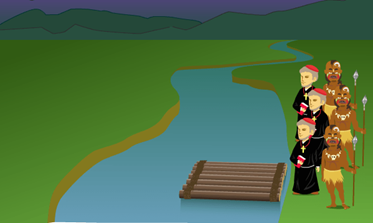


In [ ]:
# Solución propuesta

In [ ]:
# código propuesto para DFS

In [ ]:
# código propuesto para BFS

In [ ]:
# imagen con los casos de prueba